# INTRODUCTION

We have a data which classified if patients have heart disease or not according to features in it. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient.
In addition, we will analyze for this dataset. We will use a wide range of tools for this part. If there's value in there, we'il do it there. Finally, machine learning algorithms are estimated.

In [1]:
import warnings
warnings.filterwarnings('ignore')

<br>

<font size=4px>Importing some useful libraries</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

<br>

<font size=4px>Loading the data</font>

In [4]:
data = pd.read_csv('./csv/heart.csv')
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


<br>

<font size=4px>Dataset Columns (Features)</font>

* Age (age in years)
* Sex (1 = male; 0 = female)
* CP (chest pain type)
* TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
* CHOL (serum cholestoral in mg/dl)
* FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* RESTECH (resting electrocardiographic results)
* THALACH (maximum heart rate achieved)
* EXANG (exercise induced angina (1 = yes; 0 = no))
* OLDPEAK (ST depression induced by exercise relative to rest)
* SLOPE (the slope of the peak exercise ST segment)
* CA (number of major vessels (0-3) colored by flourosopy)
* THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
* TARGET (1 or 0)

<br>

# Data Exploration

**Concise summary of a Data**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


**Dimensions of the data**

In [6]:
print('Number of rows in the dataset: ',data.shape[0])
print('Number of columns in the dataset: ',data.shape[1])

Number of rows in the dataset:  303
Number of columns in the dataset:  14


**Missing values detection.**

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<font color='green'>There are no null values in the dataset</font>

**Descriptive statistics Generation.**

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<br>

<font color='skyblue' size=3xp>**Checking how the target values depend on various features.**<font>

**1. Sex**

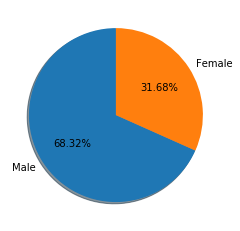

In [9]:
male = len(data[data.sex == 1])
female = len(data[data.sex == 0])
plt.pie(x=[male, female], explode=(0, 0), labels=['Male', 'Female'], autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()

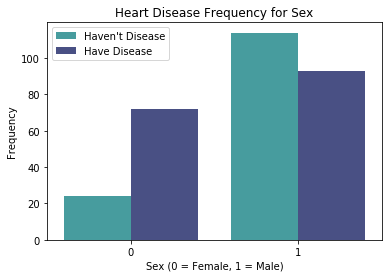

In [10]:
sn.countplot('sex',hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**2. CP (chest pain type)**

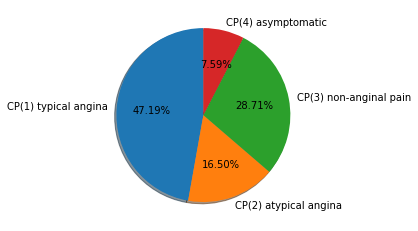

In [11]:
x = [len(data[data['cp'] == 0]),len(data[data['cp'] == 1]), len(data[data['cp'] == 2]), len(data[data['cp'] == 3])]
plt.pie(x, data=data, labels=['CP(1) typical angina', 'CP(2) atypical angina', 'CP(3) non-anginal pain', 'CP(4) asymptomatic'], autopct='%1.2f%%', shadow=True,startangle=90)
plt.show()

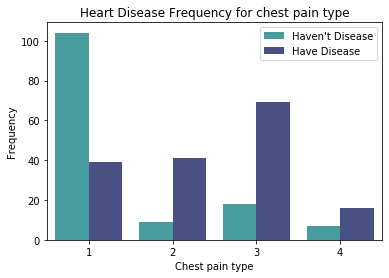

In [12]:
sn.countplot('cp',hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for chest pain type')
plt.xlabel('Chest pain type')
plt.xticks(np.arange(4), [1, 2, 3, 4], rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**3. fbs (asting blood sugar)**
<p>(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</p>

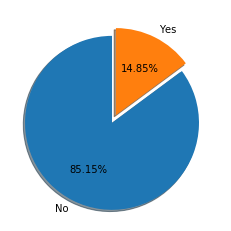

In [13]:
sizes = [len(data[data.fbs == 0]), len(data[data.fbs==1])]
labels = ['No', 'Yes']
plt.pie(x=sizes, labels=labels, explode=(0.1, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

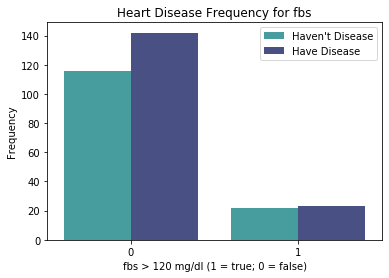

In [14]:
sn.countplot('fbs', hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for fbs')
plt.xticks(rotation=0)
plt.xlabel('fbs > 120 mg/dl (1 = true; 0 = false)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**3.restecg**
(resting electrocardiographic results)

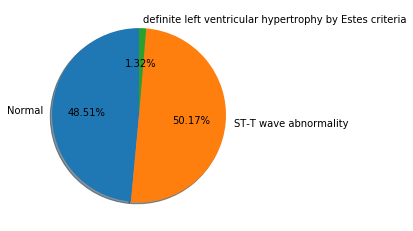

In [15]:
sizes = [len(data[data.restecg == 0]), len(data[data.restecg==1]), len(data[data.restecg==2])]
labels = ['Normal', 'ST-T wave abnormality', 'definite left ventricular hypertrophy by Estes criteria']
plt.pie(x=sizes, labels=labels, explode=(0, 0, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

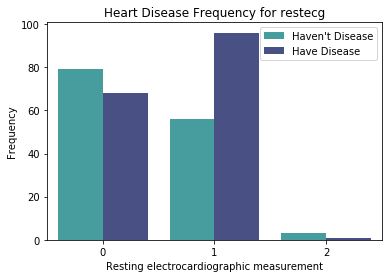

In [16]:
sn.countplot('restecg', hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for restecg')
plt.xlabel('Resting electrocardiographic measurement')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**4. exang**
(exercise induced angina)

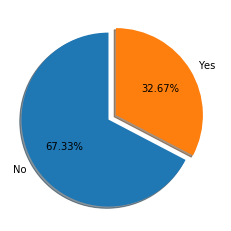

In [17]:
sizes = [len(data[data.exang == 0]), len(data[data.exang==1])]
labels = ['No', 'Yes']
plt.pie(x=sizes, labels=labels, explode=(0.1, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

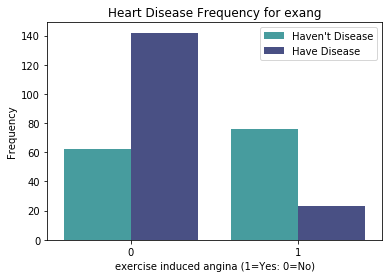

In [18]:
sn.countplot('exang', hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for exang')
plt.xlabel('exercise induced angina (1=Yes: 0=No)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**5. Slope :**
The slope of the peak exercise ST segment


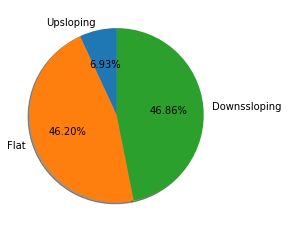

In [19]:
sizes = [len(data[data.slope == 0]), len(data[data.slope==1]), len(data[data.slope==2])]
labels = ['Upsloping', 'Flat', 'Downssloping']
plt.pie(x=sizes, labels=labels, explode=(0, 0, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

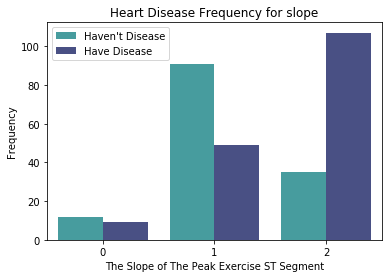

In [20]:
sn.countplot('slope', hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**6. thal :**
A blood disorder called thalassemia

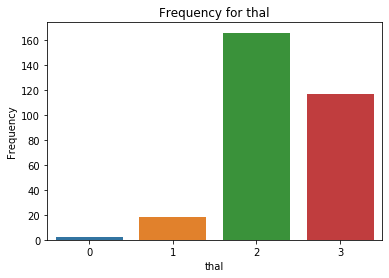

In [21]:
sn.countplot('thal', data=data)
plt.title('Frequency for thal')
plt.ylabel('Frequency')
plt.show()

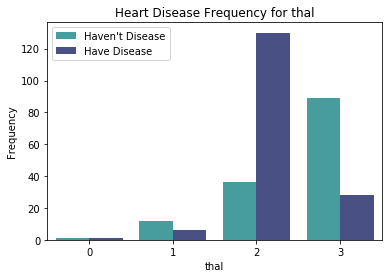

In [22]:
sn.countplot('thal', hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for thal')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**7. Age :**


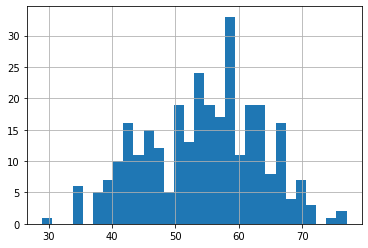

In [23]:
data.age.hist(bins=30)
plt.show()

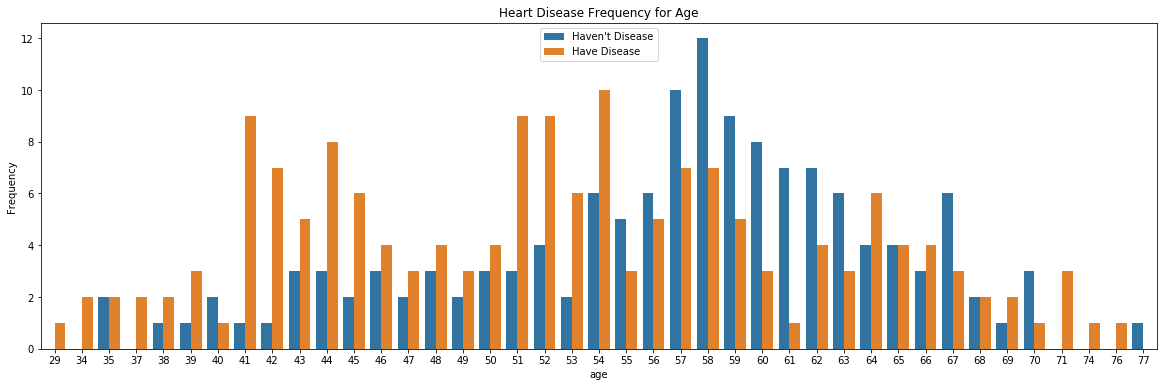

In [24]:
plt.figure(figsize=(20, 6))
sn.countplot('age', hue='target', data=data)
plt.title('Heart Disease Frequency for Age')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

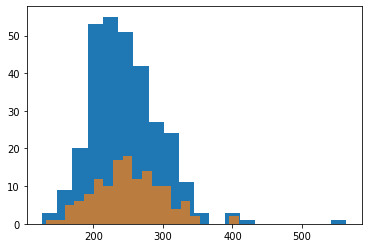

In [25]:
plt.hist(data.chol, bins=20, alpha = 1, label='All', stacked=False)
plt.hist(data.chol[data.target==0],bins=20, alpha = 0.7)
plt.show()

**8. Chol :**
serum cholestoral in mg/dl

<font color='red'>Here we can see, how Disease depends on cholestoral.

[]

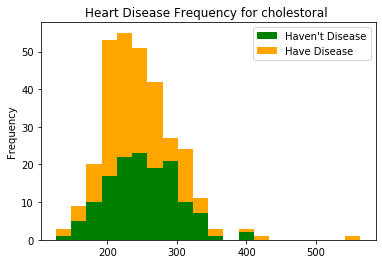

In [26]:
plt.hist([data.chol[data.target==0], data.chol[data.target==1]], bins=20,color=['green', 'orange'], stacked=True)
plt.legend(["Haven't Disease", "Have Disease"])
plt.title('Heart Disease Frequency for cholestoral ')
plt.ylabel('Frequency')
plt.plot()

In [27]:
len(data.chol[data.target==1 & (data['chol']>200)])

156

In [28]:
len(data.chol[data.target==0 & (data['chol'] > 200)])

138

In [29]:
len(data.chol[data.target==1 & ((data.chol>200) & (data.chol<220))])

149

In [30]:
len(data.chol[data.target==0 & (data.chol>200) & (data.chol<220)])

138

**9. thalach :**
maximum heart rate achieved


[]

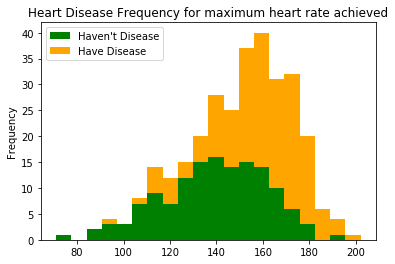

In [31]:
plt.hist([data.thalach[data.target==0], data.thalach[data.target==1]], bins=20,color=['green', 'orange'], stacked=True)
plt.legend(["Haven't Disease", "Have Disease"])
plt.title('Heart Disease Frequency for maximum heart rate achieved')
plt.ylabel('Frequency')
plt.plot()

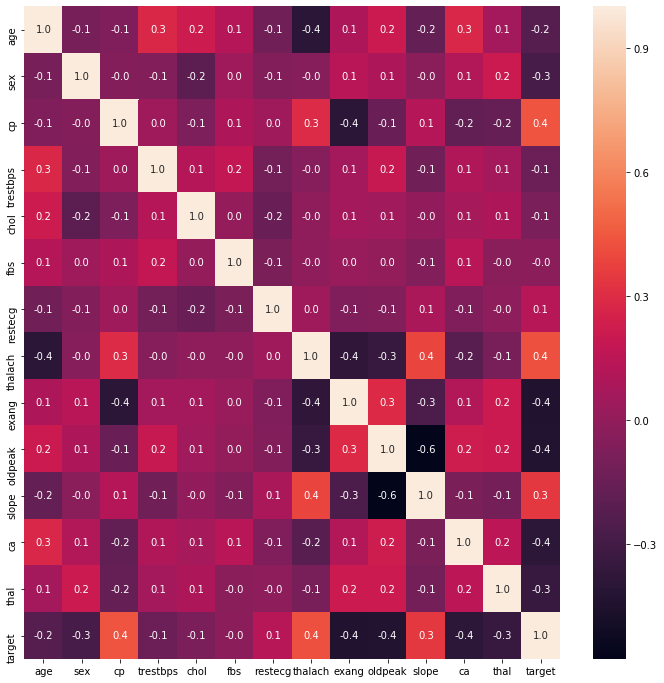

In [32]:
plt.figure(figsize=(12, 12))
sn.heatmap(data.corr(), annot=True, fmt='.1f')
plt.show()

# Data Preprocessing 

Datasets contains Categorical Data so we have to create dummy variables.<br>
'cp', 'thal' and 'slope' are categorical variables

In [33]:
cp = pd.get_dummies(data['cp'], prefix = "cp", drop_first=True)
thal = pd.get_dummies(data['thal'], prefix = "thal" , drop_first=True)
slope = pd.get_dummies(data['slope'], prefix = "slope", drop_first=True)

In [34]:
new_data = pd.concat([data, cp, thal, slope], axis=1)
new_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,1,1,0,0,1,1,0,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,2,1,0,1,0,0,1,0,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,2,1,1,0,0,0,1,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,2,1,1,0,0,0,1,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,2,1,0,0,0,0,1,0,0,1


We don't require cp, thal, slope columns so we have to drop them

In [35]:
new_data.drop(['cp', 'thal', 'slope'], axis=1, inplace=True)

In [36]:
# removing target columns from dataset
X = new_data.drop(['target'], axis=1)
y = new_data.target

**Normalize the data**

In [37]:
X = (X - X.min())/(X.max()-X.min())
X.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Train the Models

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
# checking the score at test data
lr.score(X_test, y_test)

0.9016393442622951

**Confusion Matrix**

[]

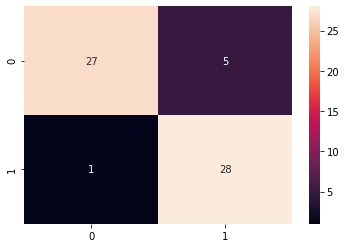

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr.predict(X_test))
sn.heatmap(cm, annot=True)
plt.plot()

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
# Setting parameters for GridSearchCV
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
lr_model = GridSearchCV(lr,param_grid=params,cv=10)

In [43]:
lr_model.fit(X_train,y_train)
lr_model.best_params_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}

In [50]:
lr = LogisticRegression(C=1, penalty='l2')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9016393442622951

In [49]:
from sklearn.metrics import auc, classification_report
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89        32
           1       0.84      0.93      0.89        29

   micro avg       0.89      0.89      0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



## Support Vector Machine

In [71]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9016393442622951

[]

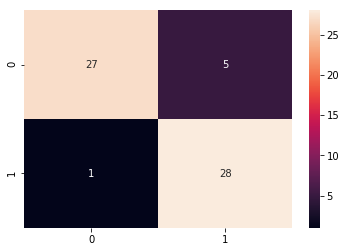

In [46]:
cm = confusion_matrix(y_test, svc.predict(X_test))
sn.heatmap(cm, annot=True)
plt.plot()

# Random Forest Classifier

In [59]:
params = {'n_estimators':list(range(10,30)),
         'max_depth':list(range(1,7))}
rf_model = GridSearchCV(RandomForestClassifier(),param_grid=params,cv=10)
rf_model.fit(X_train,y_train)
rf_model.best_params_ 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 3, 'n_estimators': 19}

In [60]:
rfc = RandomForestClassifier(n_estimators=19, max_depth=3)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8852459016393442

[]

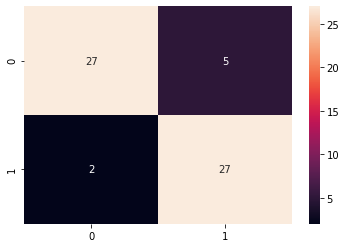

In [61]:
cm = confusion_matrix(y_test, rfc.predict(X_test))
sn.heatmap(cm, annot=True)
plt.plot()

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

0.8852459016393442

[]

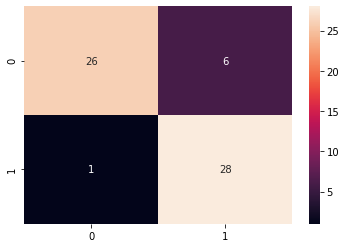

In [65]:
cm = confusion_matrix(y_test, gbc.predict(X_test))
sn.heatmap(cm, annot=True)
plt.plot()

In [66]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.9344262295081968

[]

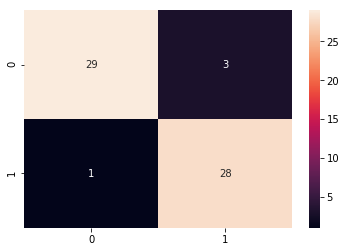

In [61]:
cm = confusion_matrix(y_test, nb.predict(X_test))
sn.heatmap(cm, annot=True)
plt.plot()

In [68]:
# measure the quality of predictions
print(classification_report(y_test, nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.90      0.97      0.93        29

   micro avg       0.93      0.93      0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



In [76]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, nb.predict(X_test))

0.9358836206896552

# Result

In [72]:
algo = ['LogisticRegression', 'SVC', 'RandomForest', 'GaussianNB', 'GradientBoosting']
score = [al.score(X_test, y_test) for al in [lr, svc, rfc, nb, gbc]] 

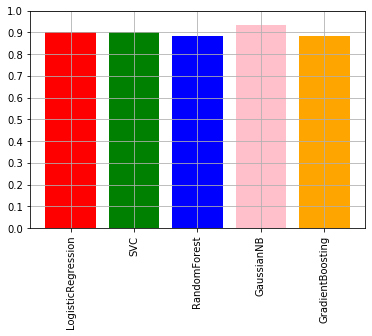

In [74]:
plt.grid()
plt.bar(x=algo, height=score, color=['red','green','b','pink','orange'])
plt.xticks(rotation=90)
plt.ylim((0,1))
plt.yticks(np.arange(0,1.1,0.1))
plt.show()